In [44]:
import numpy as np
import pandas as pd
import matplotlib


In [45]:
#Reding the data
automobile = pd.read_csv(r'BranchSalesListItems_07082019.csv')
automobile.head()

,Stock#,Lane,Item#,Year,Make,Model,Odometer,VIN,Sale Document,Loss Type,...,Primary Damage,Secondary Damage,Run & Drive,Starts,Odometer Status,Fuel Type,Cylinders,Transmission,Provider,Buy Now Price
0,25239190,NaN,#TBD,2005,ACURA,MDX,"142,876",2HNYD18945H533515,SALVAGE CERTIFICATE-CA,COLLISION,...,FRONT END,LEFT & RIGHT,NO,NO,ACTUAL,Gasoline,6 Cyl,Automatic,Mercury Insurance,$675.00
1,25162867,NaN,#TBD,2011,AUDI,Q5,"79,500",WA1WKAFP4BA058134,PREVIOUS SALVAGE-MI,WATER,...,FLOOD,FRONT & REAR,NO,NO,ACTUAL,Gasoline,6 Cyl,Automatic,Progressive Casualty Insurance,"$5,700.00"
2,25397273,NaN,#TBD,2005,BENTLEY,CONTINENTAL,"71,045",SCBCR63W25C028848,CLEAR-FL,OTHER,...,NONE,UNKNOWN,YES,YES,ACTUAL,Gasoline,12 Cyl,Automatic,NaN,"$26,000.00"
3,25112456,NaN,#TBD,2013,BMW,328,"111,025",WBA3B3C58DF536341,CLEAR-MI,COLLISION,...,RIGHT SIDE,FRONT & REAR,YES,YES,ACTUAL,Gasoline,4 Cyl,Automatic,Progressive Casualty Insurance,NaN
4,25102838,NaN,#TBD,2004,BMW,330,"151,574",WBAEW53444PN35780,CLEAR-MI,COLLISION,...,FRONT & REAR,LEFT SIDE,NO,NO,ACTUAL,Gasoline,6 Cyl,Automatic,Hanover Insurance,NaN


In [46]:
#removing unneccessary coloumns and rows with null value
automobile.drop(['Item#','Cylinders','Fuel Type','Public','Lane', 'Vehicle Location Info','Auction Date','Buy Now Price'],axis=1 , inplace=True)

automobile.head()

,Stock#,Year,Make,Model,Odometer,VIN,Sale Document,Loss Type,Primary Damage,Secondary Damage,Run & Drive,Starts,Odometer Status,Transmission,Provider
0,25239190,2005,ACURA,MDX,"142,876",2HNYD18945H533515,SALVAGE CERTIFICATE-CA,COLLISION,FRONT END,LEFT & RIGHT,NO,NO,ACTUAL,Automatic,Mercury Insurance
1,25162867,2011,AUDI,Q5,"79,500",WA1WKAFP4BA058134,PREVIOUS SALVAGE-MI,WATER,FLOOD,FRONT & REAR,NO,NO,ACTUAL,Automatic,Progressive Casualty Insurance
2,25397273,2005,BENTLEY,CONTINENTAL,"71,045",SCBCR63W25C028848,CLEAR-FL,OTHER,NONE,UNKNOWN,YES,YES,ACTUAL,Automatic,NaN
3,25112456,2013,BMW,328,"111,025",WBA3B3C58DF536341,CLEAR-MI,COLLISION,RIGHT SIDE,FRONT & REAR,YES,YES,ACTUAL,Automatic,Progressive Casualty Insurance
4,25102838,2004,BMW,330,"151,574",WBAEW53444PN35780,CLEAR-MI,COLLISION,FRONT & REAR,LEFT SIDE,NO,NO,ACTUAL,Automatic,Hanover Insurance


In [47]:
len(automobile)

589

In [48]:
automobile.Odometer=automobile.Odometer.fillna(0)
# automobile.isnull().sum()
#automobile.Odometer.value_counts(ascending=True)

In [49]:
automobile.insert(4, "segment",  True) 

In [50]:
#classified cars in 4 segments 
def Classifysegment(make):
 
    Midlevel = ['Alfa Romeo', 'RAM','Chrysler', 'Infiniti', 'MINI', 'Volkswagen' , 'JEEP','CADILLAC','LINCOLN']
    Economy = ['TOYOTA' , 'HONDA','MAZDA' , 'CHEVROLET' , 'MERCURY','BUICK','SUBARU','VOLVO' ,'GMC','DODGE','KIA','Saab', 'PONTIAC' , 'NISSAN' ,'JEEP']
    Luxury=['BMW','LEXSUS', 'MERCEDES-BENZ','LEXUS','PORSCHE','JAGUAR']
    SUPERLUXURY=['BENTLEY' , 'MASARATI']
    if make in Midlevel:
        return 'Midlevel'
    elif make in Economy:
        return 'Economy'
automobile['segment'] = [Classifysegment(make) for make in automobile.Make ]#list comprehension
#Rename Some column of dataset
automobile=automobile.rename(columns = {'Run & Drive':'Run'})

Text(0.5, 0, 'Make')

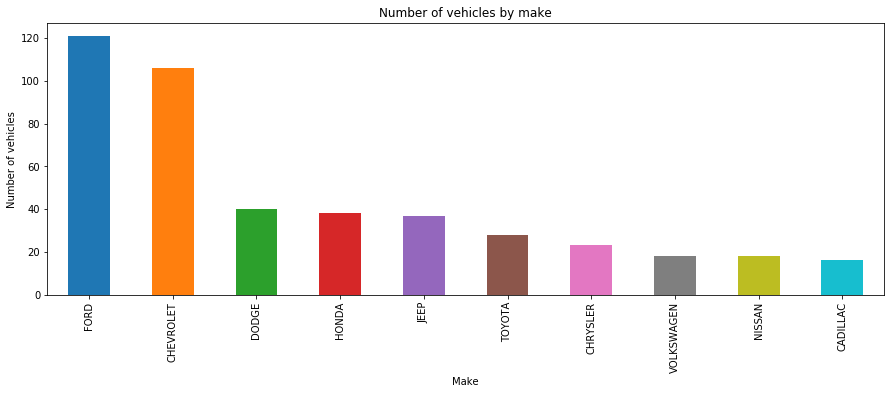

In [51]:
#Vehicle make frequency BAr chart
import matplotlib.pyplot as plt
%matplotlib inline
automobile.Make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

In [52]:
#conver Milage DataType from string to Intiger
automobile.Odometer=automobile.Odometer.astype(str).str.replace(",", "").astype(int)

#filtering cars for sales in the auction to those with these condition . IN my experince these cars can be sell in tax season
#with highest profit with less amount of time

automobile=automobile.rename(columns = {'Sale Document':'SaleDoc','Primary Damage':'PrimaryDamage','Secondary Damage':'SecondaryDamage'})

#filtering cars with the condition that with my experince I can sell buy and repire them less than $3000 and make $1000 profit
df_filtered =automobile[(automobile.Odometer<= 160000 )&( automobile.Odometer > 80000 ) & (automobile.Starts == "YES") & (automobile.Run == "YES")
                        & (automobile.segment == "Economy") & (automobile.Year<= 2011 ) & (automobile.Year>= 2005 )
                       & (automobile.SaleDoc.str.contains('CLEAR')) & (pd.notnull(automobile['Provider']))  & (automobile.PrimaryDamage !="LEFT REAR") ] 
#df_filtered.dropna()
df_filtered.drop(['segment','Starts','Run','Odometer Status', 'Transmission','SaleDoc' ,'VIN','Loss Type' ,'Provider'],axis=1 , inplace=True)
df_filtered.insert(5, "$BidSalesPrices",0)
#adding the price of car that sld in auction at bid price 
#* notice that some the sale are in pending and on call to ask seller if they want to sell it at that price or not
df_filtered.loc[:, "$BidSalesPrices"] = [ 1050, 1600,7000, 1500, 975, 1700, 1250, 3450,1100,1000,1850]
#join the model and year of car models because modeles for each brands are unique
df_filtered.head()


/Users/hamidgholizadegan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/hamidgholizadegan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Stock#,Year,Make,Model,Odometer,$BidSalesPrices,PrimaryDamage,SecondaryDamage
92,25294725,2010,CHEVROLET,HHR,88069,1050,FRONT END,LEFT & RIGHT
102,24790296,2009,CHEVROLET,IMPALA,132063,1600,LEFT SIDE,REAR
210,24883315,2009,DODGE,RAM 1500,129447,7000,LEFT & RIGHT,NaN
355,25273689,2011,HONDA,ACCORD,98029,1500,FRONT & REAR,LEFT SIDE
356,25175362,2008,HONDA,ACCORD,150787,975,FRONT END,NaN


In [53]:


#creating dictionary fro dameges of the cars
df_filtered.SecondaryDamage = df_filtered.SecondaryDamage.replace(np.nan, 'nothing')
PrimaryDamage = {'FRONT END': 1.0,'LEFT SIDE': 3.0,'FRONT & REAR':4.0 ,'LEFT & RIGHT':5.0}
SecondaryDamage = {'REAR': 2,'RIGHT FRONT': 2.5,'LEFT SIDE':3,'FRONT & REAR':4 ,'LEFT & RIGHT':5 ,'nothing':0}
df_filtered.loc[:, "PrimaryDamage"] = [PrimaryDamage[item] for item in df_filtered.PrimaryDamage]
df_filtered.loc[:, "SecondaryDamage"] = [SecondaryDamage[item] for item in df_filtered.SecondaryDamage]


df_filtered.head()
#automobile.Odometer = ''.join(ch for ch in automobile.Odometer if ch.isdigit())
#automobile["Odometer"] = automobile.Odometer.astype(float)

/Users/hamidgholizadegan/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Stock#,Year,Make,Model,Odometer,$BidSalesPrices,PrimaryDamage,SecondaryDamage
92,25294725,2010,CHEVROLET,HHR,88069,1050,1.0,5.0
102,24790296,2009,CHEVROLET,IMPALA,132063,1600,3.0,2.0
210,24883315,2009,DODGE,RAM 1500,129447,7000,5.0,0.0
355,25273689,2011,HONDA,ACCORD,98029,1500,4.0,3.0
356,25175362,2008,HONDA,ACCORD,150787,975,1.0,0.0


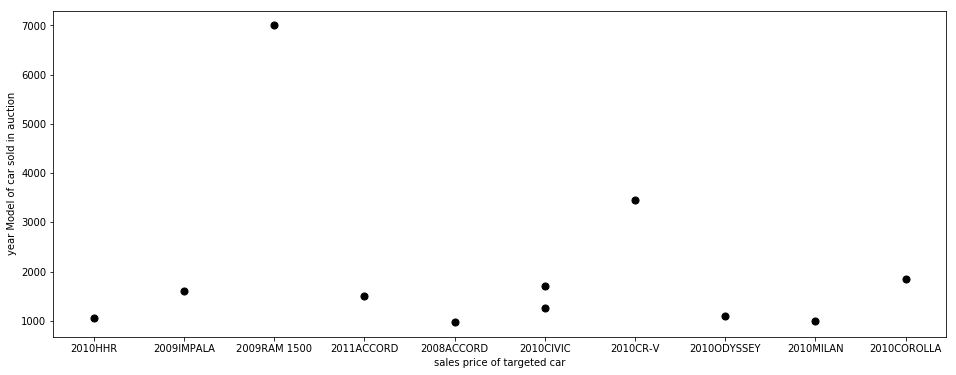

In [55]:
# Getting the traget cars in aution  and plotting it
 
plt.figure(figsize=(16,6))
f1 = [''.join(i) for i in zip(df_filtered["Year"].map(str),df_filtered["Model"])]
f2 = df_filtered['$BidSalesPrices'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1,f2,s=50,c='black')
plt.ylabel("year Model of car sold in auction")
plt.xlabel("sales price of targeted car")
plt.show()

In [56]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)

#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(df_filtered[:6], df_filtered['$BidSalesPrices']).predict(df_filtered[6:])

#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

ValueError: could not convert string to float: 'CIVIC'